In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
import matplotlib.pyplot as plt
import os 
from sklearn.tree import plot_tree , DecisionTreeClassifier # Plotting of DecisionTree?

In [2]:
os.chdir(r"D:\Downloads\Sauabh\Tree")

In [3]:
banks=pd.read_excel(r'bank.xlsx', sheet_name="bank") 

In [4]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
banks["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [6]:
banks["job"].value_counts(dropna=False)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [7]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<AxesSubplot:>

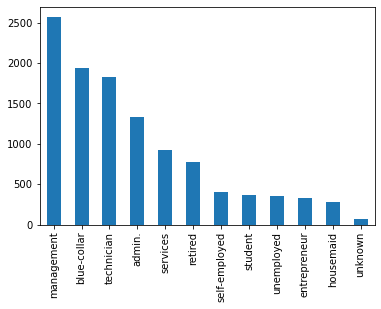

In [8]:
banks["job"].value_counts().plot(kind="bar")

In [9]:
banks["job"]=banks["job"].replace(["management", "admin."], "White-collar")

banks["job"]=banks["job"].replace(["services", "housemaid"], "Pink-collar")

banks["job"]=banks["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")

banks["job"]=banks["job"].replace(["self-employed", "entrepreneur"], "self-depend")

In [10]:
banks["marital"].value_counts(dropna=False)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [11]:
banks.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [12]:
banks["education"].value_counts(dropna=False)

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [13]:
banks["default"].value_counts(dropna=False)
banks["default_"]=banks["default"].map({"yes":1, "no":0})
banks.drop(columns=["default"], inplace=True)

In [14]:
banks["default_"].value_counts()

0    10994
1      168
Name: default_, dtype: int64

In [15]:
banks["housing"].value_counts(dropna=False)
banks["housing"]=banks["housing"].map({"yes":1, "no":0})

In [16]:
banks["housing"].value_counts(dropna=False)

0    5881
1    5281
Name: housing, dtype: int64

In [17]:
banks["loan"].value_counts(dropna=False)
banks["loan"]=banks["loan"].map({"yes":1, "no":0})

In [18]:
banks["contact"].value_counts(dropna=False)

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [19]:
banks[banks["contact"]=="unknown"]

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_
0,59,White-collar,married,secondary,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,White-collar,married,secondary,45,0,0,unknown,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,yes,0
3,55,Pink-collar,married,secondary,2476,1,0,unknown,5,may,579,1,-1,0,unknown,yes,0
4,54,White-collar,married,tertiary,184,0,0,unknown,5,may,673,2,-1,0,unknown,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,55,Pink-collar,divorced,secondary,2166,1,0,unknown,28,may,23,17,-1,0,unknown,no,0
11144,60,Others,married,secondary,0,1,0,unknown,15,may,229,1,-1,0,unknown,no,0
11148,32,blue-collar,married,secondary,1,1,0,unknown,8,may,102,1,-1,0,unknown,no,0
11151,40,White-collar,married,tertiary,917,1,0,unknown,20,may,292,1,-1,0,unknown,no,0


In [20]:
banks.drop(columns=["contact"], inplace=True)

In [21]:
banks["day"].value_counts()

20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
8     419
17    411
28    410
4     402
29    388
19    384
7     382
11    373
16    369
9     364
2     334
3     306
27    284
22    269
26    252
23    245
25    224
10    163
31    140
24    122
1     122
Name: day, dtype: int64

In [22]:
def my_days(x):
    if x<=7:
        return "Start_of_Month"
    elif x>7 and x <=25:
        return "Mid_of_the_Month"
    elif x>25:
        return "End_of_Month"
    else:
        return "Unknown"
    
        

In [23]:
banks["day"]=banks["day"].apply(my_days)

In [24]:
banks["day"].value_counts()

Mid_of_the_Month    6740
Start_of_Month      2470
End_of_Month        1952
Name: day, dtype: int64

In [25]:
banks["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [26]:
def myq(x):
    if x in ["jan", "feb", "mar"]:
        return "q1"
    elif x in ["apr", "may", "jun"]:
        return "q2"
    elif x in ["jul", "aug", "sep"]:
        return "q3"
    elif x in ["oct", "nov", "dec"]:
        return "q4"
    else:
        return "unknown"
    

In [27]:
banks["quarter"]=banks["month"].apply(myq)
banks.drop(columns=["month"], inplace=True)

In [28]:
banks.dtypes[banks.dtypes=="object"]

job          object
marital      object
education    object
day          object
poutcome     object
deposit      object
quarter      object
dtype: object

In [29]:
banks["poutcome"].value_counts(dropna=False)

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [30]:
banks["poutcome"]=banks["poutcome"].replace(["unknown", "other"], "unknown")

In [31]:
banks["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [32]:
banks["deposit"]=banks["deposit"].map({"yes":1, "no":0})

#### Numerical Variables

In [33]:
banks.describe(percentiles=[0.01,.02, .03,.04,.05,.25,.5,.75,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,95%,96%,97%,98%,99%,max
age,11162.0,41.231948,11.913369,18.0,22.0,24.0,25.0,25.00,26.00,32.0,39.0,49.00,61.00,64.00,68.00,72.00,77.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,-522.0,-367.0,-244.0,-147.36,-54.95,122.0,550.0,1708.00,6026.45,6987.48,8090.36,10086.00,13226.98,81204.0
housing,11162.0,0.473123,0.499299,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0
loan,11162.0,0.130801,0.337198,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,1.00,1.00,1.00,1.00,1.00,1.0
duration,11162.0,371.993818,347.128386,2.0,14.0,23.0,34.0,44.00,51.00,138.0,255.0,496.00,1079.90,1148.00,1236.17,1372.34,1577.17,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,1.0,1.0,1.00,1.00,1.0,2.0,3.00,7.00,8.00,8.00,10.00,13.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.0,-1.0,20.75,326.00,343.00,355.00,369.00,425.39,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.00,5.00,5.00,6.00,7.00,10.00,58.0
deposit,11162.0,0.473840,0.499338,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0
default_,11162.0,0.015051,0.121761,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1.00,1.0


In [34]:
3881/60/60

1.0780555555555555

In [35]:
banks.drop(columns=["default_"], inplace=True)

In [36]:
banks[banks["balance"]<0].head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,poutcome,deposit,quarter
17,49,Pink-collar,married,secondary,-8,1,0,Mid_of_the_Month,1119,1,-1,0,unknown,1,q2
23,43,blue-collar,married,primary,-192,1,0,Mid_of_the_Month,1120,2,-1,0,unknown,1,q2
30,32,blue-collar,married,secondary,-1,1,0,Mid_of_the_Month,653,1,-1,0,unknown,1,q2
42,45,self-depend,divorced,tertiary,-395,1,0,Mid_of_the_Month,470,1,-1,0,unknown,1,q2
59,57,technician,married,tertiary,-1,0,0,Mid_of_the_Month,850,2,-1,0,unknown,1,q2


### Bivariate Analysis

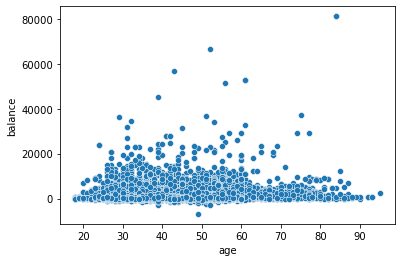

In [37]:
import seaborn as sns
sns.scatterplot(x="age", y="balance", data=banks)
plt.show()

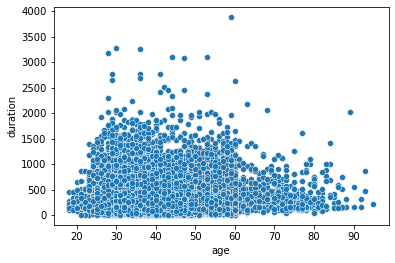

In [38]:
sns.scatterplot(x="age", y="duration", data=banks)
plt.show()

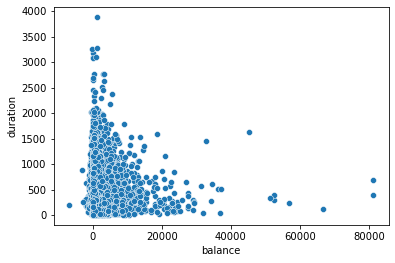

In [39]:
sns.scatterplot(x="balance", y="duration", data=banks)
plt.show()

### Cat-num

In [40]:
banks.groupby(["job"])["age"].min()

job
Others          18
Pink-collar     21
White-collar    20
blue-collar     20
self-depend     21
technician      21
Name: age, dtype: int64

In [41]:
banks.groupby(["job"]).agg({"age":["min", "mean", "max"]})

age               
             min       mean max
job                            
Others        18  49.976358  95
Pink-collar   21  40.271512  82
White-collar  20  39.929487  78
blue-collar   20  39.505144  63
self-depend   21  41.186903  84
technician    21  39.001646  71

In [42]:
banks.groupby(["job"]).agg({"balance":["min", "mean", "max"]})

balance                    
                 min         mean    max
job                                     
Others         -1206  1933.827476  81204
Pink-collar    -1531  1146.406850  26965
White-collar   -6847  1589.186410  56831
blue-collar    -1489  1203.926440  66653
self-depend    -3058  1756.443383  52587
technician     -1944  1556.294569  45248

<AxesSubplot:>

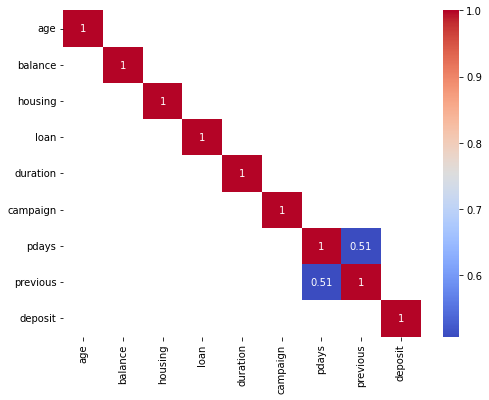

In [43]:
plt.figure(figsize=(8,6))
cr=banks.corr()
cr1=cr[abs(cr) >=.5]
sns.heatmap(cr1, annot=True, cmap="coolwarm")

In [44]:
banks_dummy=pd.get_dummies(data=banks)

In [45]:
banks_dummy.isnull().sum()

age                     0
balance                 0
housing                 0
loan                    0
duration                0
campaign                0
pdays                   0
previous                0
deposit                 0
job_Others              0
job_Pink-collar         0
job_White-collar        0
job_blue-collar         0
job_self-depend         0
job_technician          0
marital_divorced        0
marital_married         0
marital_single          0
education_primary       0
education_secondary     0
education_tertiary      0
education_unknown       0
day_End_of_Month        0
day_Mid_of_the_Month    0
day_Start_of_Month      0
poutcome_failure        0
poutcome_success        0
poutcome_unknown        0
quarter_q1              0
quarter_q2              0
quarter_q3              0
quarter_q4              0
dtype: int64

### Outliers

In [46]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    return x

In [47]:
banks_dummy=banks_dummy.apply(outliers)

In [48]:
banks_dummy["balance"]=np.where(banks_dummy["balance"]>0,banks_dummy["balance"], 0)

In [49]:
banks_dummy["balance"].min()

0.0

### Modeling Part

In [50]:
y=banks_dummy["deposit"]
x=banks_dummy.drop(columns=["deposit"])

In [51]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.3, random_state=0)

In [52]:
dt1=DecisionTreeClassifier()

In [53]:
dt1.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
print("Train accuracy", dt1.score(x_train, y_train))
print("Test accuracy", dt1.score(x_test, y_test))

Train accuracy 1.0
Test accuracy 0.7494774559570021


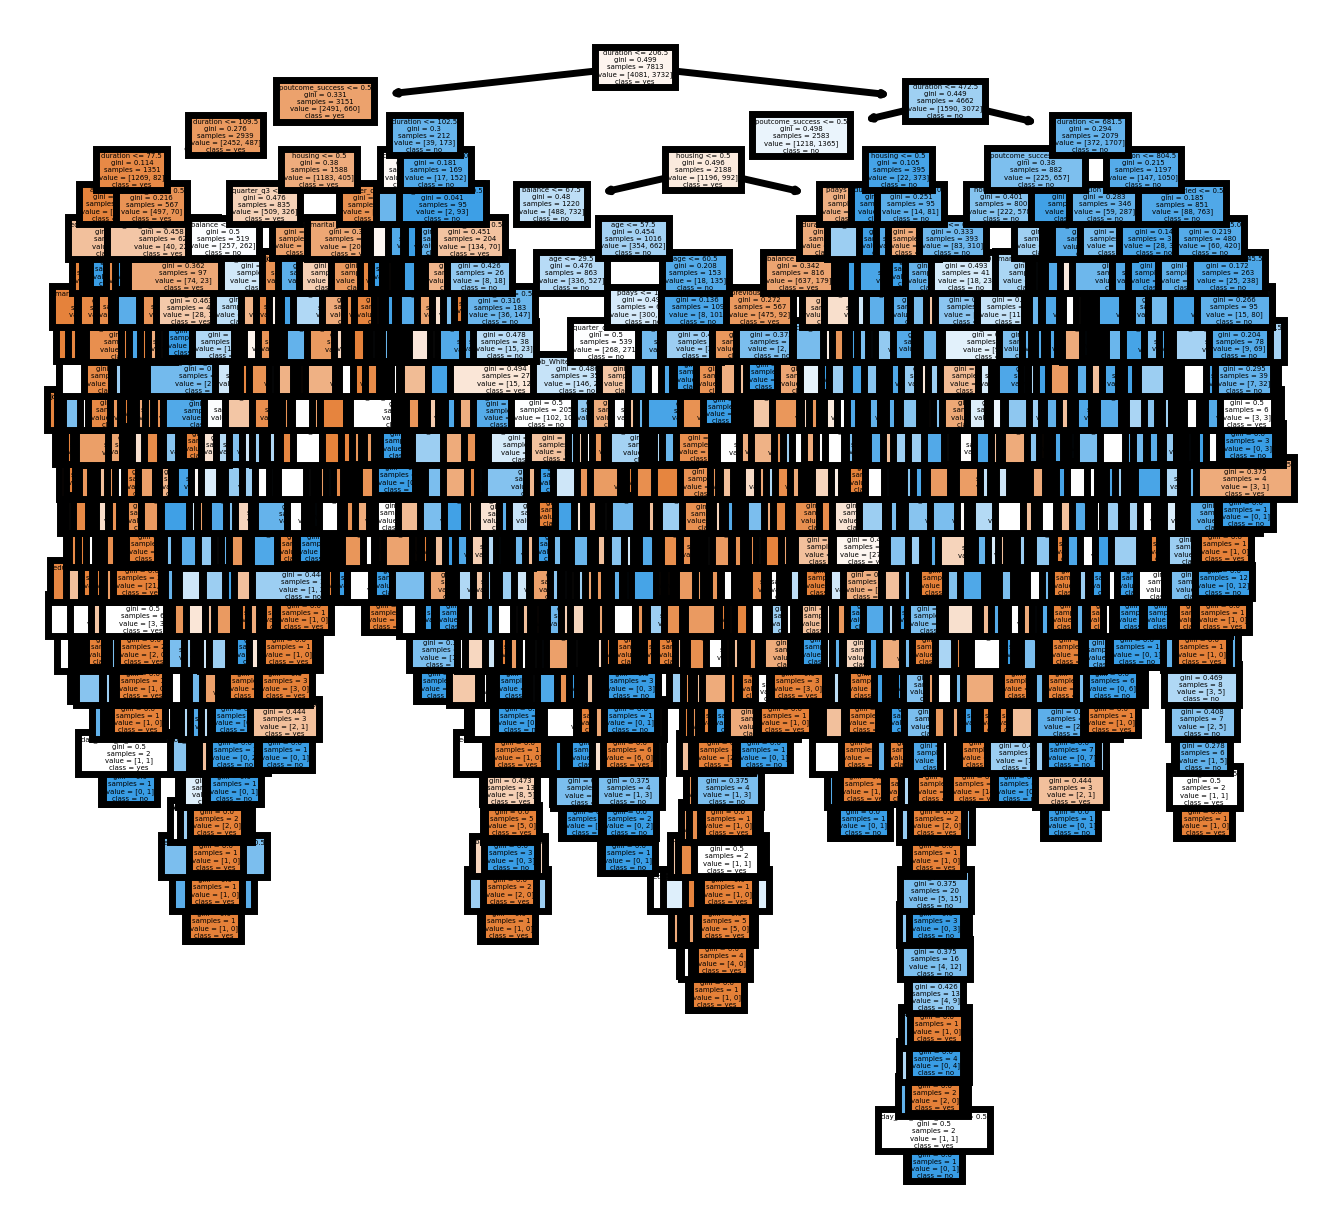

In [55]:
from sklearn.tree import plot_tree

fn=x_train.columns

cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt1,
           feature_names = fn, 
           class_names=cn,
           filled = True);

Train accuracy 0.7874056060412133
Test accuracy 0.787996416840848


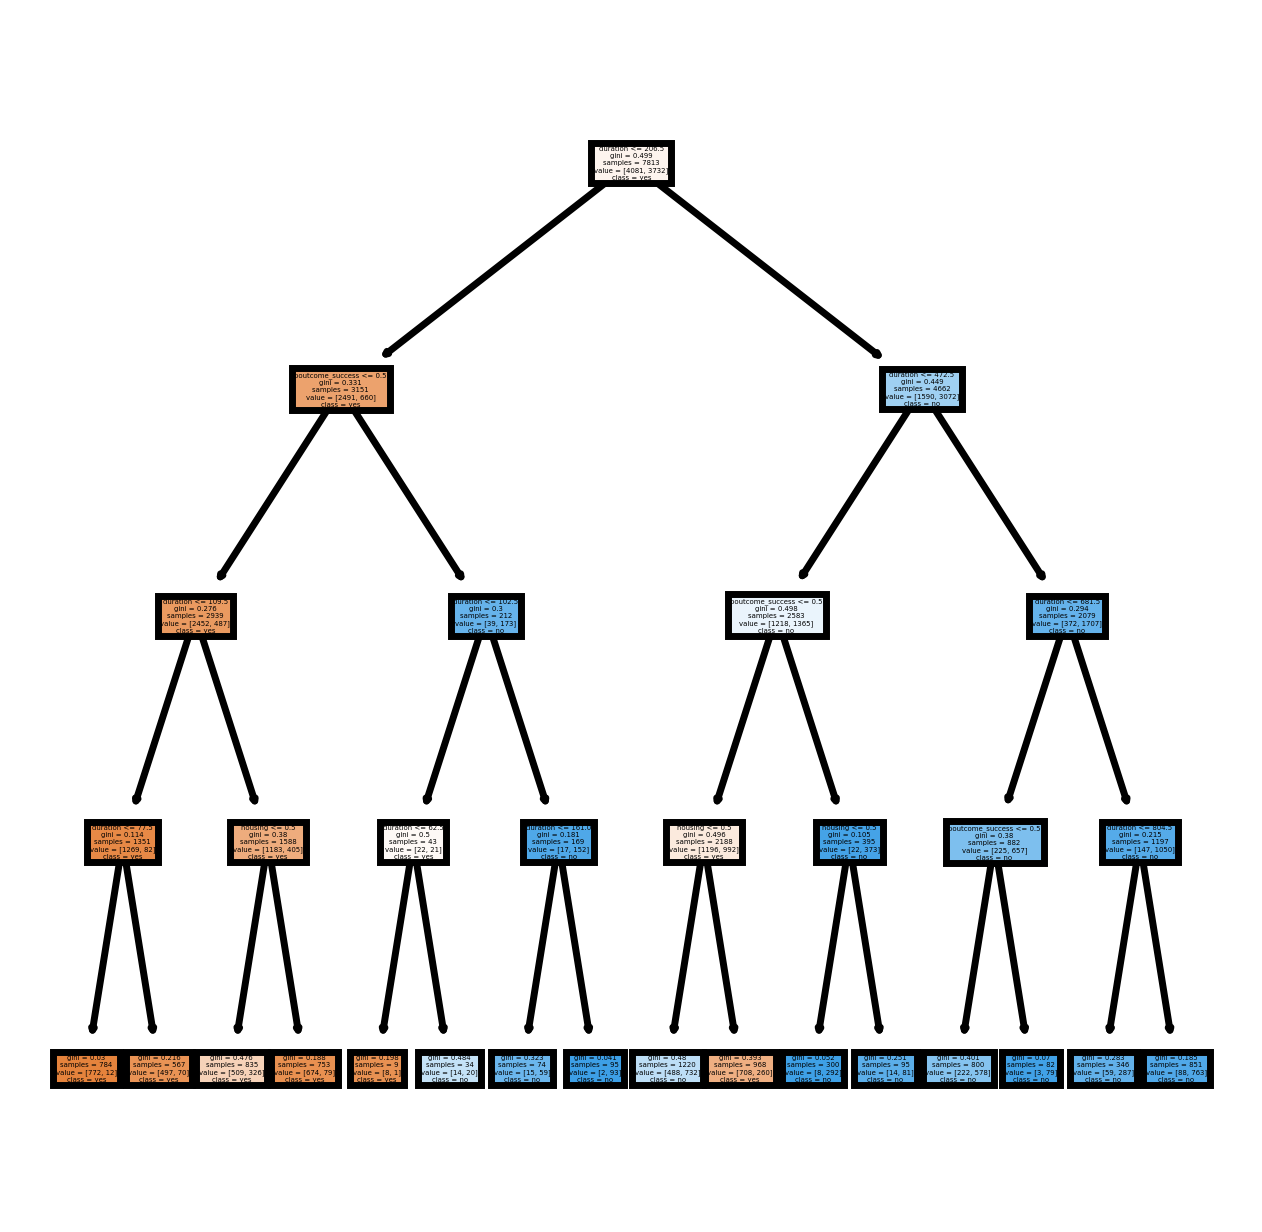

In [56]:
dt2=DecisionTreeClassifier(max_depth=4)
dt2.fit(x_train, y_train)
print("Train accuracy", dt2.score(x_train, y_train))
print("Test accuracy", dt2.score(x_test, y_test))

fn=x_train.columns

cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt2,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [57]:
dt3=DecisionTreeClassifier(min_samples_split=10)
dt3.fit(x_train, y_train)
print("Train accuracy", dt3.score(x_train, y_train))
print("Test accuracy", dt3.score(x_test, y_test))

Train accuracy 0.9288365544605145
Test accuracy 0.763511495968946


In [58]:
dt3=DecisionTreeClassifier(min_samples_leaf=100)
dt3.fit(x_train, y_train)
print("Train accuracy", dt3.score(x_train, y_train))
print("Test accuracy", dt3.score(x_test, y_test))

Train accuracy 0.8154358121080251
Test accuracy 0.8002388772767991


In [59]:
dt3=DecisionTreeClassifier(max_depth=10)
dt3.fit(x_train, y_train)
print("Train accuracy", dt3.score(x_train, y_train))
print("Test accuracy", dt3.score(x_test, y_test))

Train accuracy 0.8685524126455907
Test accuracy 0.7859062406688564


In [60]:
dt3=DecisionTreeClassifier(criterion="gini")
dt3.fit(x_train, y_train)
print("Train accuracy", dt3.score(x_train, y_train))
print("Test accuracy", dt3.score(x_test, y_test))

Train accuracy 1.0
Test accuracy 0.7491788593610033


In [61]:
dt3=DecisionTreeClassifier(criterion="entropy")
dt3.fit(x_train, y_train)
print("Train accuracy", dt3.score(x_train, y_train))
print("Test accuracy", dt3.score(x_test, y_test))

Train accuracy 1.0
Test accuracy 0.7566437742609734


In [62]:
params={"criterion": ["gini", "entropy"],
       "max_depth" :[5, 7,9,11],
       "min_samples_split":[20, 50,100, 200],
       "min_samples_leaf": [5,10,15,30]}

In [63]:
dtg=DecisionTreeClassifier(random_state=0)

dt_grid=GridSearchCV(estimator=dtg, param_grid=params, cv=10, n_jobs=-1,
                     verbose=2)


In [64]:
dt_grid.fit(x_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 9, 11],
                         'min_samples_leaf': [5, 10, 15, 30],
                         'min_samples_split': [20, 50, 100, 200]},
             verbose=2)

In [65]:
dt_grid.param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 7, 9, 11],
 'min_samples_split': [20, 50, 100, 200],
 'min_samples_leaf': [5, 10, 15, 30]}

In [66]:
dt_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 10,
 'min_samples_split': 200}

In [67]:
dt_grid.best_score_

0.8090358940436388

In [68]:
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200, random_state=0)

In [69]:
dt_after_grd=DecisionTreeClassifier(criterion='entropy',
                                    max_depth=11, 
                                    min_samples_leaf=10,
                                    min_samples_split=200,
                                    random_state=0)

In [70]:
dt_after_grd.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=10,
                       min_samples_split=200, random_state=0)

In [71]:
print("Train accuracy", dt_after_grd.score(x_train, y_train))
print("Test accuracy", dt_after_grd.score(x_test, y_test))

Train accuracy 0.8250351977473441
Test accuracy 0.8038220364287847


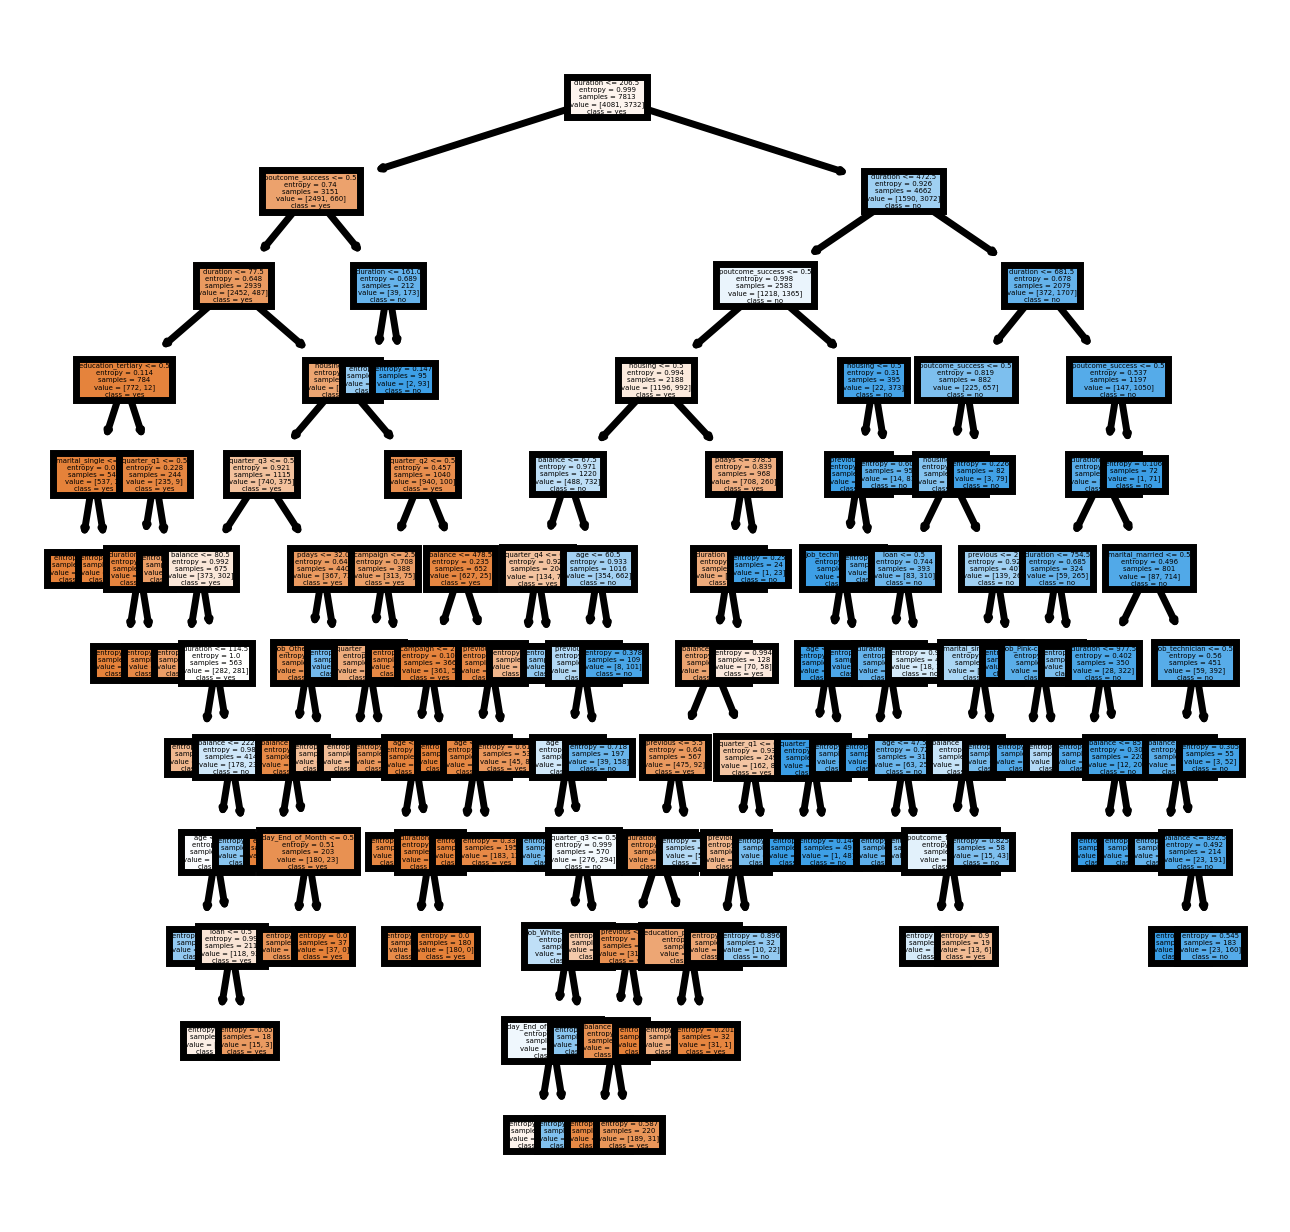

In [72]:
fn=x_train.columns

cn=["yes","no"]

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)

plot_tree(dt_after_grd,
           feature_names = fn, 
           class_names=cn,
           filled = True);

In [73]:
dt_after_grd.feature_importances_

array([0.02490511, 0.04700083, 0.09736119, 0.00390275, 0.52021713,
       0.00613854, 0.02864565, 0.02247192, 0.00541615, 0.00170119,
       0.00270821, 0.        , 0.        , 0.00192274, 0.        ,
       0.00111785, 0.00372864, 0.00235362, 0.        , 0.0020546 ,
       0.        , 0.00390358, 0.        , 0.        , 0.00087672,
       0.17088701, 0.        , 0.00652565, 0.01353383, 0.02881166,
       0.00381542])

In [74]:
x_train.columns

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'job_Others', 'job_Pink-collar', 'job_White-collar',
       'job_blue-collar', 'job_self-depend', 'job_technician',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'day_End_of_Month', 'day_Mid_of_the_Month',
       'day_Start_of_Month', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown', 'quarter_q1', 'quarter_q2', 'quarter_q3',
       'quarter_q4'],
      dtype='object')

In [77]:
Var_imp=pd.DataFrame({"Var":x_train.columns, 
              "imp":dt_after_grd.feature_importances_}).sort_values(by=["imp"], 
                                                                    ascending=False)

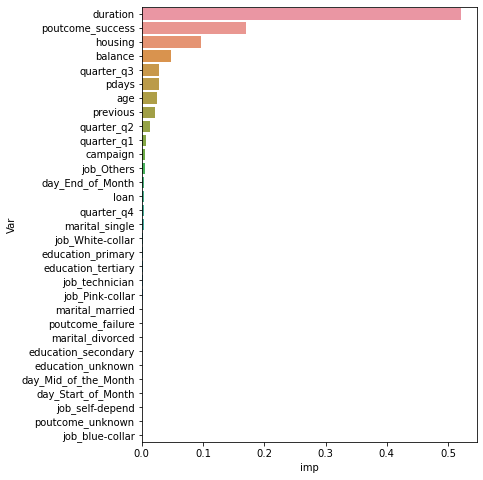

In [91]:
plt.figure(figsize=(6,8))
sns.barplot(y="Var", x="imp", data=Var_imp,orient='h')
plt.show()

In [110]:
selected_var=Var_imp[Var_imp["imp"]>=0.006139]["Var"].to_list()
selected_var

['duration',
 'poutcome_success',
 'housing',
 'balance',
 'quarter_q3',
 'pdays',
 'age',
 'previous',
 'quarter_q2',
 'quarter_q1']

In [111]:
x_train1=x_train[selected_var]
x_test1=x_test[selected_var]

In [112]:
dt_after_grd=DecisionTreeClassifier(criterion='entropy',
                                    max_depth=11, 
                                    min_samples_leaf=10,
                                    min_samples_split=200,
                                    random_state=0)
dt_after_grd.fit(x_train1, y_train)
print("Train accuracy", dt_after_grd.score(x_train1, y_train))
print("Test accuracy", dt_after_grd.score(x_test1, y_test))

Train accuracy 0.8241392550876744
Test accuracy 0.8032248432367871


In [113]:
x_train1.shape

(7813, 10)

In [114]:
pred_y_train=dt_after_grd.predict(x_train1)
pred_y_test=dt_after_grd.predict(x_test1)

In [115]:
metrics.recall_score(y_train, pred_y_train)

0.8362808145766345

In [138]:
def my_classification_model_eval(y_actual, y_pred, further_use=True):
    mt=metrics.confusion_matrix(y_actual,y_pred)
    recall_1=mt[1,1]/ (mt[1,1]+mt[1,0])
    precision_1=mt[1,1]/ (mt[1,1]+mt[0,1])
    f1_score_1=(2*recall_1*precision_1)/ (precision_1+recall_1)
    Accuracy=(mt[1,1]+mt[0,0])/mt.sum()
    if further_use==False:
        print(f"for 1 \nRecall : {recall_1}\nPrecision : {precision_1}\nf1 score :{f1_score_1}\naccuracy : {Accuracy}")
    elif further_use==True:
        return Accuracy, recall_1, precision_1, f1_score_1

In [139]:
my_classification_model_eval(y_train, pred_y_train, further_use=False)

for 1 
Recall : 0.8362808145766345
Precision : 0.8035530381050463
f1 score :0.8195903361344538
accuracy : 0.8241392550876744


In [140]:
my_classification_model_eval(y_test, pred_y_test, further_use=False)

for 1 
Recall : 0.7996146435452793
Precision : 0.782035175879397
f1 score :0.7907272149888854
accuracy : 0.8032248432367871
